# Computer-Aided Musicology
## Chords and Harmonic Field
<p align="left">
<img src="./img/businesscard.jpg" width="500px" alt="Business Card" align="left" >
</p>
<br>

[www.rptecnologias.com](http://www.rptecnologias.com)
<br>
guitars.ai@rptecnologias.com


# Import Packages

In [43]:
#Imports 
from music21 import *
from IPython.display import Image
from collections import deque

# Auxiliary Function to Display Musical Score
def get_score_png():
    filename = ! ls *.png -Art | tail -n 1
    return(filename[0])

## Chord

"A chord is a harmonic unit with at least three different tones sounding simultaneously.
The term includes all possible such sonorities." 

- Benward, B., 2003. Music In Theory and Practice Spiral. Mcgraw-Hill College.

### Chord Properties

In [26]:
Cmajor = chord.Chord(['C','E','G'])

In [27]:
# http://web.mit.edu/music21/doc/moduleReference/moduleChord.html
print(Cmajor.fullName)
print(Cmajor.pitchedCommonName)
print(Cmajor.third)

Chord {C | E | G} Quarter
C-major triad
E


### Chord Transpose

In [28]:
chord2 = Cmajor.transpose('M3')
print(chord2.fullName)
print(chord2.pitchedCommonName)

Chord {E | G-sharp | B} Quarter
E-major triad


In [29]:
chord3 = Cmajor.transpose(4)
print(chord3.fullName)
print(chord3.pitchedCommonName)

Chord {E | G-sharp | B} Quarter
E-major triad


### Chord Display

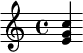

In [34]:
Cmajor.show('lily.png')
Image(filename=get_score_png())

## Harmonic Field
 
 "Duration is the length of time a pitch, or tone, is sounded." - Benward, B., 2003. Music In Theory and Practice Spiral. Mcgraw-Hill College.

In [37]:
CMajorScale=scale.MajorScale(pitch.Pitch('C3'))
print("C Major Scale",[str(p) for p in CMajorScale.pitches])

C Major Scale ['C3', 'D3', 'E3', 'F3', 'G3', 'A3', 'B3', 'C4']


In [75]:
# Function to shift the Tonic to the Desired Degree of a Scale
def shift_notes(list_name, desired_degree):
    tmp_list=list(list_name)
    for i in range(desired_degree-1):
        tmp_list.pop(0)
        tmp_list.append(tmp_list[0].transpose('P8'))
    return tmp_list
        
    
    

In [76]:
list_of_notes=[note.Note(p) for p in CMajorScale.pitches]
list_of_notes

[<music21.note.Note C>,
 <music21.note.Note D>,
 <music21.note.Note E>,
 <music21.note.Note F>,
 <music21.note.Note G>,
 <music21.note.Note A>,
 <music21.note.Note B>,
 <music21.note.Note C>]

In [82]:
shifted_scale=shift_notes(list_of_notes, 9)
shifted_scale

[<music21.note.Note D>,
 <music21.note.Note E>,
 <music21.note.Note F>,
 <music21.note.Note G>,
 <music21.note.Note A>,
 <music21.note.Note B>,
 <music21.note.Note C>,
 <music21.note.Note D>]

In [15]:
n2=n1.transpose('m3')
print(n2.fullName)

C in octave 5 Eighth Note


In [16]:
r = note.Rest(type='whole')
print(r.fullName)

Whole Rest


## Interval
 
"Intervals, or distances in pitch space between two pitches, are fundamental concepts of music theory, dating back at least to Ancient Greece, and are thus fundamental concepts in music21 as well." - http://web.mit.edu/music21/doc/usersGuide/usersGuide_18_intervals.html

In [17]:
i = interval.Interval('m7')

In [18]:
print(i.niceName)
print(i.semitones)


Minor Seventh
10


In [19]:
n3=i.transposeNote(n1)
print("Orignal Note:", n1.fullName)
print("Transposed Note:", n3.fullName)
n4=i.reverse().transposeNote(n1)
print("Resersed Transposed Note:", n4.fullName)


Orignal Note: A in octave 4 Eighth Note
Transposed Note: G in octave 5 Eighth Note
Resersed Transposed Note: B in octave 3 Eighth Note


## Scale

In [20]:
harmonicMinor = scale.HarmonicMinorScale('C4')

In [21]:
print([str(p) for p in harmonicMinor.pitches])

['C4', 'D4', 'E-4', 'F4', 'G4', 'A-4', 'B4', 'C5']


In [22]:
list_of_notes=[note.Note(p) for p in harmonicMinor.pitches]
list_of_intervals=[interval.notesToInterval(list_of_notes[0],n) for n in list_of_notes]
print("Intervals:", [t.name for t in list_of_intervals])

Intervals: ['P1', 'M2', 'm3', 'P4', 'P5', 'm6', 'M7', 'P8']


In [23]:
harmonicMinor.deriveRanked(['c', 'e-', 'g'])

[(3, <music21.scale.HarmonicMinorScale G harmonic minor>),
 (3, <music21.scale.HarmonicMinorScale E harmonic minor>),
 (3, <music21.scale.HarmonicMinorScale C harmonic minor>),
 (2, <music21.scale.HarmonicMinorScale B- harmonic minor>)]

In [24]:
harmonicMinorBflat = scale.HarmonicMinorScale('B-4')
print([str(p) for p in harmonicMinorBflat.pitches])

['B-4', 'C5', 'D-5', 'E-5', 'F5', 'G-5', 'A5', 'B-5']


In [25]:
harmonicMinorBflat.deriveByDegree(7, 'c')

<music21.scale.HarmonicMinorScale D- harmonic minor>

In [26]:
harmonicMinorDflat = scale.HarmonicMinorScale('D-4')
print([str(p) for p in harmonicMinorDflat.pitches])

['D-4', 'E-4', 'F-4', 'G-4', 'A-4', 'B--4', 'C5', 'D-5']


In [27]:
def minor_pentatonic(pitch_name):
    list_of_intervals=['p1','m3', 'p4', 'p5', 'm7']
    
    return [interval.Interval(interval_symbol).transposePitch(pitch.Pitch(pitch_name)) 
           for interval_symbol in list_of_intervals]

In [28]:
AminorPentatonic= minor_pentatonic('A4')
print([p.nameWithOctave for p in AminorPentatonic])

['A4', 'C5', 'D5', 'E5', 'G5']


In [29]:
majorScale=scale.MajorScale()
majorScale.deriveAll(AminorPentatonic)

[<music21.scale.MajorScale G major>,
 <music21.scale.MajorScale F major>,
 <music21.scale.MajorScale C major>]

## Stream

In [30]:
# Objects stored in a Stream are generally spaced in time; 
# each stored object has an offset usually representing how many quarter notes it lies from the beginning of the Stream. 
#For instance in a 4/4 measure of two half notes, the first note will be at offset 0.0, and the second at offset 2.0.
s = stream.Stream()

In [31]:
sr = note.SpacerRest(type='whole')
s.append(sr)
s.append([note.Note(p) for p in AminorPentatonic])

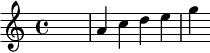

In [32]:
s.show('lily.png')
Image(filename=get_score_png())

In [33]:
s.show('midi')